In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Califonia Housing Dataset

In [3]:
from sklearn.datasets import fetch_california_housing

# Load California housing dataset
california = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)

# Add target column (median house value)
df['Price'] = california.target

# Display the first 5 rows
print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [4]:
# Drop 'Longitude',HouseAge and AveBedrooms column to reduce multicolinearity 
df = df.drop(columns=['Longitude'])

In [5]:
df = df.drop(columns=['HouseAge'])

In [6]:
df = df.drop(columns=['AveBedrms'])

# Training the dataset without using KFold Cross Validation

In [7]:
# Define feature (MedInc) and target (Price)
X = df[['MedInc']]  # Independent variable
y = df['Price']      # Dependent variable

In [8]:
# Split data into training (80%) and testing (20%)
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Initialize Linear Regression model
model = LinearRegression()

In [11]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Calculate R² score
r2 = r2_score(y_test, y_pred)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

In [14]:
# Print the evaluation metrics
print(f"R² Score: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

R² Score: 0.45885918903846656
Mean Absolute Error (MAE): 0.629908653009376
Mean Squared Error (MSE): 0.7091157771765548


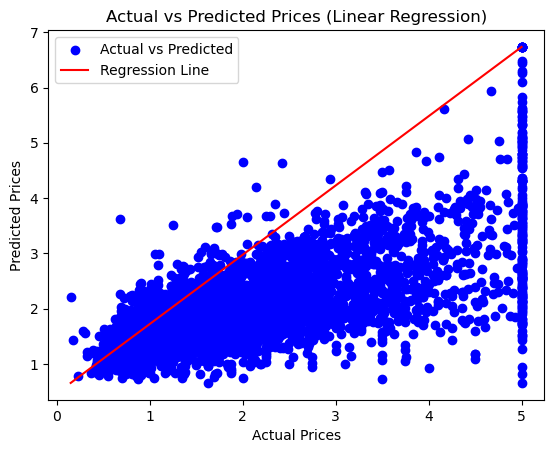

In [52]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

# Plot the line (y = y_pred) for better visualization
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', label='Regression Line')

# Labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')

# Display legend
plt.legend()

# Show plot
plt.show()


# 🔹 How Does K-Fold Cross-Validation Work?

Instead of using a single train-test split, K-Fold CV ensures that the model is evaluated on different subsets of data, making the assessment more reliable.

#### ✔ Taking the mean of R² scores ensures the model is tested on different subsets, reducing bias from a single split.
#### ✔ If the scores are consistent across folds, it indicates the model generalizes well.
#### ✔ If the scores have high variance, it means the model is not stable and might be overfitting.

# Training the dataset using KFold Cross Validation

## How Variance in R² Scores Helps Detect Overfitting?


#### Low Variance (Stable Model) ✅
- If the R² scores across different folds are close to each other, it means the model is performing consistently on different data subsets.
- This indicates good generalization (i.e., the model works well on unseen data).

#### High Variance (Potential Overfitting) ⚠
- If the R² scores have large differences (e.g., some folds give 0.9 while others give 0.4), the model is likely memorizing patterns in some splits but failing on others.
- This suggests overfitting—the model performs well only on specific data and fails on new data.

In [21]:
from sklearn.model_selection import KFold, cross_val_score

In [22]:
# Define K-Fold Cross Validation (5 splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation on training data
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')

# Print average R² score across folds
print("Average R² Score:", np.mean(scores))

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Average R² Score: 0.4768767764035429
Coefficients: [0.41933849]
Intercept: 0.4445972916907872


In [23]:
# Calculate mean, variance, and standard deviation of R² scores
mean_r2 = np.mean(scores)
variance_r2 = np.var(scores)  # Variance
std_dev_r2 = np.std(scores)   # Standard deviation

In [60]:
print(mean_r2)

0.4768767764035429


In [24]:
print("Variance of R² Scores:", variance_r2)
print("Standard Deviation of R² Scores:", std_dev_r2)

Variance of R² Scores: 0.00013558668305642488
Standard Deviation of R² Scores: 0.011644169487620183


In [54]:
# Predict y values using the trained model
y_new_pred = model.predict(X_test)


In [56]:
y_new_pred


array([1.14958917, 1.50606882, 1.90393718, ..., 4.31500772, 1.612455  ,
       1.93412956])

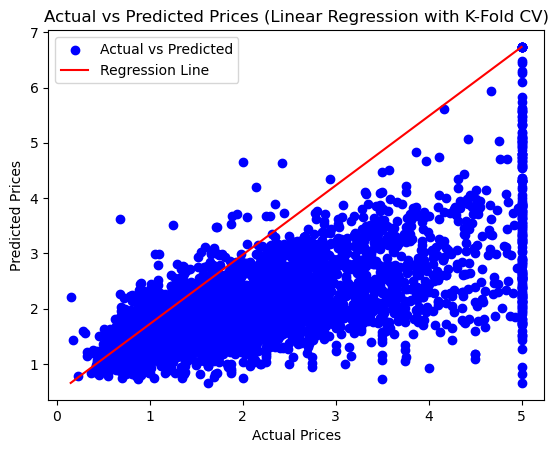

In [58]:
import matplotlib.pyplot as plt

# Predict y values using the trained model
y_pred = model.predict(X_test)

# Scatter plot for actual vs. predicted values
plt.scatter(y_test, y_new_pred, color='blue', label='Actual vs Predicted')

# Regression line (diagonal line for reference)
plt.plot([min(y_test), max(y_test)], [min(y_new_pred), max(y_new_pred)], color='red', label='Regression Line')

# Labels and Title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression with K-Fold CV)')

# Display Legend
plt.legend()

# Show Plot
plt.show()


# Conclusion:

#### 1. Slightly Improved Performance After K-Fold CV
- The R² score increased from 0.4589 (without K-Fold) to 0.4768 (with K-Fold).
- This suggests that the model is generalizing better across different subsets of the data.

#### 2. Model Stability and Generalization
- The low variance (0.000135) and low standard deviation (0.0116) indicate that the model performs consistently across different folds.
- A high variance in R² scores would suggest overfitting (model performs well on some subsets and poorly on others).
- Since the variance is low, we can conclude that the model is not overfitting significantly and is stable across different data splits.